In [49]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import hvplot.pandas
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
columns = ["CCN", "REPORT_DAT","SHIFT", "OFFENSE", "METHOD", "VOTING_PRECINCT", "XBLOCK", "YBLOCK","PSA", "NEIGHBORHOOD_CLUSTER"]
target = ["crimetype"]

In [51]:
#Load data
file_path = Path('Crime_Incidents_in_2021 (1).csv')
dc_crime_df_2021 = pd.read_csv(file_path, skiprows=0)[:-2]

dc_crime_df_2021 = dc_crime_df_2021.loc[:, columns].copy()
dc_crime_df_2021 = dc_crime_df_2021.dropna(axis='columns', how='all')

#drop the null rows:
dc_crime_df_2021 = dc_crime_df_2021.dropna()

dc_crime_df_2021.head(10)

,CCN,REPORT_DAT,SHIFT,OFFENSE,METHOD,VOTING_PRECINCT,XBLOCK,YBLOCK,PSA,NEIGHBORHOOD_CLUSTER
0,20139232,2021/12/06 05:00:00+00,MIDNIGHT,HOMICIDE,GUN,Precinct 46,398576.16,141939.53,407.0,Cluster 18
1,11048862,2021/10/13 21:24:42+00,EVENING,THEFT F/AUTO,OTHERS,Precinct 27,394049.03,140468.17,204.0,Cluster 15
2,10008883,2021/08/04 20:36:50+00,EVENING,THEFT/OTHER,OTHERS,Precinct 105,406401.56,135172.74,604.0,Cluster 33
3,11124202,2021/09/01 12:39:59+00,DAY,THEFT/OTHER,OTHERS,Precinct 77,400924.55,137563.02,506.0,Cluster 23
4,12113231,2021/08/12 12:00:17+00,DAY,THEFT/OTHER,OTHERS,Precinct 76,401249.74,138295.18,506.0,Cluster 23
5,15003190,2021/10/21 04:08:27+00,MIDNIGHT,THEFT F/AUTO,OTHERS,Precinct 129,397041.70,137184.93,207.0,Cluster 8
6,21051546,2021/04/23 14:39:37+00,DAY,THEFT F/AUTO,OTHERS,Precinct 69,402674.74,140800.41,503.0,Cluster 24
7,21051553,2021/04/23 16:37:32+00,DAY,BURGLARY,OTHERS,Precinct 83,400318.94,137500.98,501.0,Cluster 25
8,21051567,2021/04/23 15:48:59+00,DAY,THEFT/OTHER,OTHERS,Precinct 144,399695.20,137774.00,501.0,Cluster 25
9,21051603,2021/04/23 16:08:48+00,DAY,THEFT/OTHER,OTHERS,Precinct 91,401147.60,134664.50,106.0,Cluster 26


In [52]:
file_path = Path('Crime_Incidents_in_2020 (1).csv')
dc_crime_df_2020 = pd.read_csv(file_path, skiprows=0)[:-2]

dc_crime_df_2020 = dc_crime_df_2020.loc[:, columns].copy()
dc_crime_df_2020 = dc_crime_df_2020.dropna(axis='columns', how='all')

#drop the null rows:
dc_crime_df_2020 = dc_crime_df_2020.dropna()

dc_crime_df_2020.head(10)

,CCN,REPORT_DAT,SHIFT,OFFENSE,METHOD,VOTING_PRECINCT,XBLOCK,YBLOCK,PSA,NEIGHBORHOOD_CLUSTER
0,19229474,2020/01/06 17:59:54+00,DAY,THEFT/OTHER,OTHERS,Precinct 141,397228.810000,138511.210000,301.0,Cluster 3
1,20000062,2020/01/01 07:37:38+00,MIDNIGHT,MOTOR VEHICLE THEFT,OTHERS,Precinct 91,400734.620319,134715.449978,106.0,Cluster 26
2,20000165,2020/01/01 08:36:44+00,MIDNIGHT,THEFT/OTHER,OTHERS,Precinct 17,397001.240000,137426.670000,207.0,Cluster 8
3,20000188,2020/01/01 09:20:49+00,MIDNIGHT,THEFT F/AUTO,OTHERS,Precinct 21,397921.280000,138345.510000,307.0,Cluster 7
4,20000202,2020/01/01 09:53:33+00,MIDNIGHT,ASSAULT W/DANGEROUS WEAPON,GUN,Precinct 1,399214.790000,137753.750000,102.0,Cluster 8
5,20000205,2020/01/01 09:25:41+00,MIDNIGHT,ROBBERY,OTHERS,Precinct 69,403053.650000,140739.910000,503.0,Cluster 24
6,20000217,2020/01/01 10:34:52+00,MIDNIGHT,THEFT/OTHER,OTHERS,Precinct 14,396217.890000,138008.230000,208.0,Cluster 6
7,20000218,2020/01/01 10:26:32+00,MIDNIGHT,MOTOR VEHICLE THEFT,OTHERS,Precinct 144,399272.370000,136594.950000,102.0,Cluster 25
8,20000232,2020/01/01 11:07:24+00,MIDNIGHT,ASSAULT W/DANGEROUS WEAPON,GUN,Precinct 79,402339.050000,137267.000000,507.0,Cluster 23
9,20000249,2020/01/01 10:56:19+00,MIDNIGHT,THEFT/OTHER,OTHERS,Precinct 137,397921.520000,138712.810000,305.0,Cluster 3


In [53]:
frames = [dc_crime_df_2021, dc_crime_df_2020]

dc_crime_df = pd.concat(frames)
display(dc_crime_df)

,CCN,REPORT_DAT,SHIFT,OFFENSE,METHOD,VOTING_PRECINCT,XBLOCK,YBLOCK,PSA,NEIGHBORHOOD_CLUSTER
0,20139232,2021/12/06 05:00:00+00,MIDNIGHT,HOMICIDE,GUN,Precinct 46,398576.160000,141939.530000,407.0,Cluster 18
1,11048862,2021/10/13 21:24:42+00,EVENING,THEFT F/AUTO,OTHERS,Precinct 27,394049.030000,140468.170000,204.0,Cluster 15
2,10008883,2021/08/04 20:36:50+00,EVENING,THEFT/OTHER,OTHERS,Precinct 105,406401.560000,135172.740000,604.0,Cluster 33
3,11124202,2021/09/01 12:39:59+00,DAY,THEFT/OTHER,OTHERS,Precinct 77,400924.550000,137563.020000,506.0,Cluster 23
4,12113231,2021/08/12 12:00:17+00,DAY,THEFT/OTHER,OTHERS,Precinct 76,401249.740000,138295.180000,506.0,Cluster 23
...,...,...,...,...,...,...,...,...,...,...
27905,20026522,2020/02/13 04:55:40+00,MIDNIGHT,THEFT F/AUTO,OTHERS,Precinct 67,400346.610000,142041.770000,405.0,Cluster 20
27906,20029077,2020/02/17 17:26:55+00,DAY,THEFT/OTHER,OTHERS,Precinct 113,403198.671489,132699.499289,606.0,Cluster 35
27907,20029087,2020/02/17 18:03:27+00,DAY,THEFT F/AUTO,OTHERS,Precinct 114,400867.100000,132951.290000,701.0,Cluster 28
27908,20029090,2020/02/17 18:15:15+00,DAY,THEFT F/AUTO,OTHERS,Precinct 35,396163.700000,139534.460000,303.0,Cluster 1


In [54]:
dc_crime_df['REPORT_DAT'] = pd.to_datetime(dc_crime_df['REPORT_DAT'].astype(str), errors='coerce')
dc_crime_df['REPORT_DAT'] = pd.to_datetime(dc_crime_df['REPORT_DAT'], format = '%d/%m/%Y %H:%M:%S')

column_1 = dc_crime_df['REPORT_DAT']
db=pd.DataFrame({"year": column_1.dt.year,
              "month": column_1.dt.month,
              "day": column_1.dt.day,
#               "dayofyear": column_1.dt.dayofyear,
#               "week": column_1.dt.week,
#               "weekofyear": column_1.dt.weekofyear,
              "dayofweek": column_1.dt.dayofweek,
              "quarter": column_1.dt.quarter,
             })

In [55]:
dc_crime_df = dc_crime_df.drop('REPORT_DAT', axis=1)
dc_crime_df=pd.concat([db,dc_crime_df], axis=1)
dc_crime_df

,year,month,day,dayofweek,quarter,CCN,SHIFT,OFFENSE,METHOD,VOTING_PRECINCT,XBLOCK,YBLOCK,PSA,NEIGHBORHOOD_CLUSTER
0,2021,12,6,0,4,20139232,MIDNIGHT,HOMICIDE,GUN,Precinct 46,398576.160000,141939.530000,407.0,Cluster 18
1,2021,10,13,2,4,11048862,EVENING,THEFT F/AUTO,OTHERS,Precinct 27,394049.030000,140468.170000,204.0,Cluster 15
2,2021,8,4,2,3,10008883,EVENING,THEFT/OTHER,OTHERS,Precinct 105,406401.560000,135172.740000,604.0,Cluster 33
3,2021,9,1,2,3,11124202,DAY,THEFT/OTHER,OTHERS,Precinct 77,400924.550000,137563.020000,506.0,Cluster 23
4,2021,8,12,3,3,12113231,DAY,THEFT/OTHER,OTHERS,Precinct 76,401249.740000,138295.180000,506.0,Cluster 23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27905,2020,2,13,3,1,20026522,MIDNIGHT,THEFT F/AUTO,OTHERS,Precinct 67,400346.610000,142041.770000,405.0,Cluster 20
27906,2020,2,17,0,1,20029077,DAY,THEFT/OTHER,OTHERS,Precinct 113,403198.671489,132699.499289,606.0,Cluster 35
27907,2020,2,17,0,1,20029087,DAY,THEFT F/AUTO,OTHERS,Precinct 114,400867.100000,132951.290000,701.0,Cluster 28
27908,2020,2,17,0,1,20029090,DAY,THEFT F/AUTO,OTHERS,Precinct 35,396163.700000,139534.460000,303.0,Cluster 1


In [56]:
# Categorize data from method column into violent or non-violent
def categorise (row):
    if row["METHOD"]=='GUN':
        return 'VIOLENT'
    elif row["METHOD"]=='KNIFE':
        return "VIOLENT"
    elif row["METHOD"]=='OTHERS':
        return "NON-VIOLENT"
    return "NON-VIOLENT"

In [57]:
# Create new colum with crimetype - violent or non-violent
dc_crime_df["crimetype"] = dc_crime_df.apply(lambda row: categorise (row), axis=1)
dc_crime_df

,year,month,day,dayofweek,quarter,CCN,SHIFT,OFFENSE,METHOD,VOTING_PRECINCT,XBLOCK,YBLOCK,PSA,NEIGHBORHOOD_CLUSTER,crimetype
0,2021,12,6,0,4,20139232,MIDNIGHT,HOMICIDE,GUN,Precinct 46,398576.160000,141939.530000,407.0,Cluster 18,VIOLENT
1,2021,10,13,2,4,11048862,EVENING,THEFT F/AUTO,OTHERS,Precinct 27,394049.030000,140468.170000,204.0,Cluster 15,NON-VIOLENT
2,2021,8,4,2,3,10008883,EVENING,THEFT/OTHER,OTHERS,Precinct 105,406401.560000,135172.740000,604.0,Cluster 33,NON-VIOLENT
3,2021,9,1,2,3,11124202,DAY,THEFT/OTHER,OTHERS,Precinct 77,400924.550000,137563.020000,506.0,Cluster 23,NON-VIOLENT
4,2021,8,12,3,3,12113231,DAY,THEFT/OTHER,OTHERS,Precinct 76,401249.740000,138295.180000,506.0,Cluster 23,NON-VIOLENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27905,2020,2,13,3,1,20026522,MIDNIGHT,THEFT F/AUTO,OTHERS,Precinct 67,400346.610000,142041.770000,405.0,Cluster 20,NON-VIOLENT
27906,2020,2,17,0,1,20029077,DAY,THEFT/OTHER,OTHERS,Precinct 113,403198.671489,132699.499289,606.0,Cluster 35,NON-VIOLENT
27907,2020,2,17,0,1,20029087,DAY,THEFT F/AUTO,OTHERS,Precinct 114,400867.100000,132951.290000,701.0,Cluster 28,NON-VIOLENT
27908,2020,2,17,0,1,20029090,DAY,THEFT F/AUTO,OTHERS,Precinct 35,396163.700000,139534.460000,303.0,Cluster 1,NON-VIOLENT


In [58]:
dc_crime_df=pd.get_dummies(dc_crime_df, columns=['METHOD', 'VOTING_PRECINCT', 'NEIGHBORHOOD_CLUSTER', 'crimetype','OFFENSE'])
dc_crime_df

,year,month,day,dayofweek,quarter,CCN,SHIFT,XBLOCK,YBLOCK,PSA,...,crimetype_VIOLENT,OFFENSE_ARSON,OFFENSE_ASSAULT W/DANGEROUS WEAPON,OFFENSE_BURGLARY,OFFENSE_HOMICIDE,OFFENSE_MOTOR VEHICLE THEFT,OFFENSE_ROBBERY,OFFENSE_SEX ABUSE,OFFENSE_THEFT F/AUTO,OFFENSE_THEFT/OTHER
0,2021,12,6,0,4,20139232,MIDNIGHT,398576.160000,141939.530000,407.0,...,1,0,0,0,1,0,0,0,0,0
1,2021,10,13,2,4,11048862,EVENING,394049.030000,140468.170000,204.0,...,0,0,0,0,0,0,0,0,1,0
2,2021,8,4,2,3,10008883,EVENING,406401.560000,135172.740000,604.0,...,0,0,0,0,0,0,0,0,0,1
3,2021,9,1,2,3,11124202,DAY,400924.550000,137563.020000,506.0,...,0,0,0,0,0,0,0,0,0,1
4,2021,8,12,3,3,12113231,DAY,401249.740000,138295.180000,506.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27905,2020,2,13,3,1,20026522,MIDNIGHT,400346.610000,142041.770000,405.0,...,0,0,0,0,0,0,0,0,1,0
27906,2020,2,17,0,1,20029077,DAY,403198.671489,132699.499289,606.0,...,0,0,0,0,0,0,0,0,0,1
27907,2020,2,17,0,1,20029087,DAY,400867.100000,132951.290000,701.0,...,0,0,0,0,0,0,0,0,1,0
27908,2020,2,17,0,1,20029090,DAY,396163.700000,139534.460000,303.0,...,0,0,0,0,0,0,0,0,1,0


In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dc_crime_df['SHIFT'] = le.fit_transform(dc_crime_df["SHIFT"])

In [60]:
#set X and y
X = dc_crime_df.drop("SHIFT", axis=1).values
y = dc_crime_df["SHIFT"].values

In [74]:
#Training Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [75]:
# Model - Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dc_crime_dtree = DecisionTreeClassifier()
dc_crime_dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [76]:
predictions = dc_crime_dtree.predict(X_test)

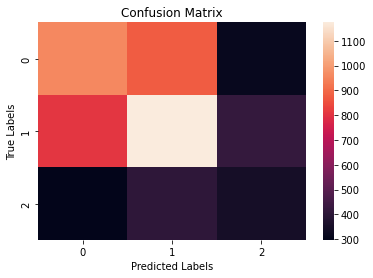

In [77]:
from sklearn.metrics import classification_report, confusion_matrix
crime_cm = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots()
sns.heatmap(crime_cm, annot=False, ax = ax);
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

In [78]:
print (classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.46      0.45      0.46      2148
           1       0.48      0.49      0.48      2400
           2       0.32      0.33      0.33      1053

    accuracy                           0.44      5601
   macro avg       0.42      0.42      0.42      5601
weighted avg       0.44      0.44      0.44      5601



In [79]:
target = ["SHIFT"]

dc_crime_df.head()

,year,month,day,dayofweek,quarter,CCN,SHIFT,XBLOCK,YBLOCK,PSA,...,crimetype_VIOLENT,OFFENSE_ARSON,OFFENSE_ASSAULT W/DANGEROUS WEAPON,OFFENSE_BURGLARY,OFFENSE_HOMICIDE,OFFENSE_MOTOR VEHICLE THEFT,OFFENSE_ROBBERY,OFFENSE_SEX ABUSE,OFFENSE_THEFT F/AUTO,OFFENSE_THEFT/OTHER
0,2021,12,6,0,4,20139232,2,398576.16,141939.53,407.0,...,1,0,0,0,1,0,0,0,0,0
1,2021,10,13,2,4,11048862,1,394049.03,140468.17,204.0,...,0,0,0,0,0,0,0,0,1,0
2,2021,8,4,2,3,10008883,1,406401.56,135172.74,604.0,...,0,0,0,0,0,0,0,0,0,1
3,2021,9,1,2,3,11124202,0,400924.55,137563.02,506.0,...,0,0,0,0,0,0,0,0,0,1
4,2021,8,12,3,3,12113231,0,401249.74,138295.18,506.0,...,0,0,0,0,0,0,0,0,0,1


In [80]:
from sklearn.model_selection import train_test_split

# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [81]:
# Balanced Random Forest Calculator
from imblearn.ensemble import BalancedRandomForestClassifier
crime_brf = BalancedRandomForestClassifier(n_estimators=1500, random_state=0)

crime_brf.fit(X_train, y_train)
y_pred = crime_brf.predict(X_test)

In [82]:
#Calculate the balanced accuracy score
balanced_accuracy_score(y_test, y_pred)

0.4567448148611019

In [83]:
#Display the confusion matrix
from sklearn.metrics import confusion_matrix

y_pred=crime_brf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[2334, 1604, 1241],
       [2036, 2407, 1733],
       [ 616,  629, 1403]], dtype=int64)

In [84]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.47      0.45      0.70      0.46      0.56      0.31      5179
          1       0.52      0.39      0.71      0.45      0.53      0.27      6176
          2       0.32      0.53      0.74      0.40      0.63      0.38      2648

avg / total       0.46      0.44      0.71      0.44      0.56      0.30     14003



In [85]:
# List the features sorted in descending order by feature importance
# YOUR CODE HERE
importances = crime_brf.feature_importances_
sorted(zip(crime_brf.feature_importances_, dc_crime_df.columns), reverse=True)

[(0.1370345802613817, 'CCN'),
 (0.110484496819957, 'SHIFT'),
 (0.11046410765764424, 'XBLOCK'),
 (0.10784589760398645, 'day'),
 (0.07414976144704337, 'dayofweek'),
 (0.06912005672449327, 'month'),
 (0.04380607102716047, 'YBLOCK'),
 (0.03359569880453737, 'quarter'),
 (0.01648055659566895, 'year'),
 (0.009877267079769192, 'OFFENSE_SEX ABUSE'),
 (0.009785846813830164, 'OFFENSE_THEFT F/AUTO'),
 (0.007782865337986679, 'OFFENSE_MOTOR VEHICLE THEFT'),
 (0.007107834976357061, 'NEIGHBORHOOD_CLUSTER_Cluster 9'),
 (0.006941511021383326, 'crimetype_NON-VIOLENT'),
 (0.006421874544711106, 'METHOD_KNIFE'),
 (0.006133543435346283, 'PSA'),
 (0.005854079253581384, 'OFFENSE_ASSAULT W/DANGEROUS WEAPON'),
 (0.005721769622025397, 'OFFENSE_HOMICIDE'),
 (0.0048049208699739695, 'OFFENSE_BURGLARY'),
 (0.004653344734286544, 'OFFENSE_ARSON'),
 (0.004062437673582109, 'NEIGHBORHOOD_CLUSTER_Cluster 24'),
 (0.0036136451021814096, 'NEIGHBORHOOD_CLUSTER_Cluster 19'),
 (0.0034492558732446533, 'NEIGHBORHOOD_CLUSTER_Cluste